<a href="https://colab.research.google.com/github/fabianhormigo/Market_Analysis_example/blob/main/Bolsa_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
!pip install yfinance pandas numpy scikit-learn matplotlib
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Descarga de datos brutos yahoo finance


[*********************100%%**********************]  1 of 1 completed


                                   Open          High           Low  \
Datetime                                                              
2024-07-12 00:00:00+00:00  57341.195312  57341.195312  57341.195312   
2024-07-12 00:01:00+00:00  57377.062500  57377.062500  57377.062500   
2024-07-12 00:02:00+00:00  57364.902344  57364.902344  57364.902344   
2024-07-12 00:03:00+00:00  57347.281250  57347.281250  57347.281250   
2024-07-12 00:05:00+00:00  57299.886719  57299.886719  57299.886719   

                                  Close     Adj Close  Volume  
Datetime                                                       
2024-07-12 00:00:00+00:00  57341.195312  57341.195312       0  
2024-07-12 00:01:00+00:00  57377.062500  57377.062500  708608  
2024-07-12 00:02:00+00:00  57364.902344  57364.902344       0  
2024-07-12 00:03:00+00:00  57347.281250  57347.281250       0  
2024-07-12 00:05:00+00:00  57299.886719  57299.886719       0  


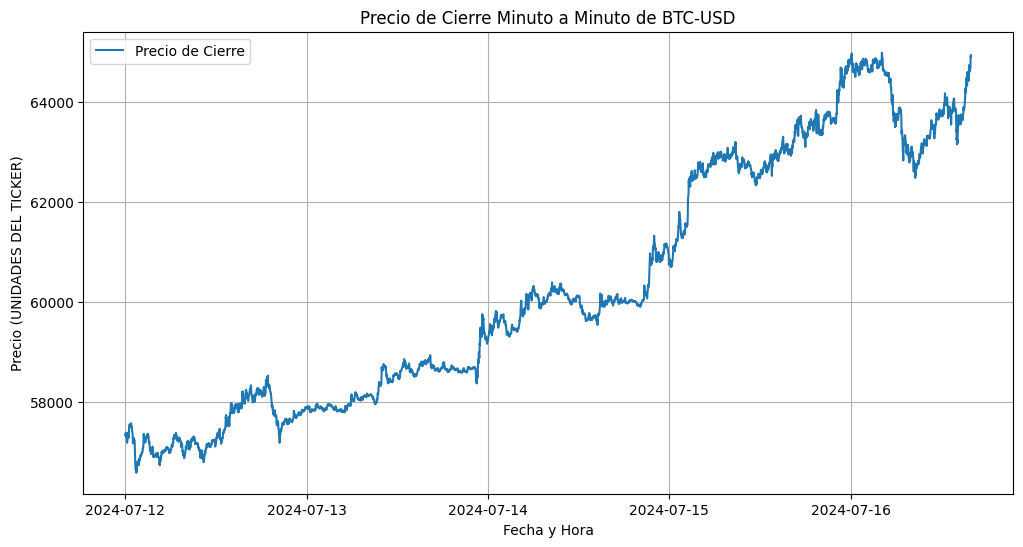

Mercado no intervenido en ningún momento del período.


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-07-12 00:00:00+00:00,57341.195312,57341.195312,57341.195312,57341.195312,57341.195312,0.000000
2024-07-12 00:01:00+00:00,57377.062500,57377.062500,57377.062500,57377.062500,57377.062500,0.001660
2024-07-12 00:02:00+00:00,57364.902344,57364.902344,57364.902344,57364.902344,57364.902344,0.000000
2024-07-12 00:03:00+00:00,57347.281250,57347.281250,57347.281250,57347.281250,57347.281250,0.000000
2024-07-12 00:05:00+00:00,57299.886719,57299.886719,57299.886719,57299.886719,57299.886719,0.000000
...,...,...,...,...,...,...
2024-07-16 15:52:00+00:00,64683.074219,64683.074219,64683.074219,64683.074219,64683.074219,0.054297
2024-07-16 15:53:00+00:00,64850.898438,64850.898438,64850.898438,64850.898438,64850.898438,0.020335
2024-07-16 15:54:00+00:00,64915.882812,64915.882812,64915.882812,64915.882812,64915.882812,0.174648


In [61]:


# Definir el ticker, periodo y intervalo
ticker = 'BTC-USD'
periodo = '5d'
intervalo = '1m'

# Descargar datos desde Yahoo Finance
datos = yf.download(tickers=ticker, period=periodo, interval=intervalo)

# Visualizar las primeras filas del DataFrame
print(datos.head())

# Graficar los precios de cierre minuto a minuto
plt.figure(figsize=(12, 6))
plt.plot(datos['Close'], label='Precio de Cierre')
plt.title(f'Precio de Cierre Minuto a Minuto de {ticker}')
plt.xlabel('Fecha y Hora')
plt.ylabel('Precio (UNIDADES DEL TICKER)') #Deben ser especificadas
plt.legend()
plt.grid(True)
plt.show()
df = datos.copy()

# Verificar si hay diferencias entre Close y Adj Close
df['Diferencia'] = df['Close'] - df['Adj Close']

# Añadir la variable de intervencion
df['Intervencion'] = (df['Diferencia'] != 0).astype(int)

# Determinar si el mercado está intervenido o no intervenido globalmente
mercado_intervenido_global = df['Intervencion'].any() == 1

if mercado_intervenido_global:
    print("Mercado intervenido en algún momento del período.")
else:
    print("Mercado no intervenido en ningún momento del período.")

# Mostrar resultados de las diferencias si el mercado estuvo intervenido
if mercado_intervenido_global:
    print("Detalles de las diferencias entre Close y Adj Close:")
    print(df[df['Diferencia'] != 0])



max_volumen = datos['Volume'].max()
datos['Volume'] = datos['Volume'] / max_volumen

datos

Analisis del mercado solo para no intervenidos en el periodo

In [62]:

# Agrupar por día
grupos_por_dia = datos.groupby(datos.index.date)

# Separar cada grupo en un DataFrame individual
dataframes_por_dia = {}
for fecha, grupo in grupos_por_dia:
    dataframes_por_dia[fecha] = grupo
# Convertir el diccionario en una lista de DataFrames
lista_dataframes = [df for df in dataframes_por_dia.values()]
print(len(lista_dataframes))
#Eliminar Adj Close
# Imprimir los DataFrames de la lista (solo para mostrar ejemplo)
# Calcular el índice de volatilidad para cada DataFrame en la lista
for df in lista_dataframes:
    df['Indice Volatilidad'] = abs((df['High'] - df['Low']) / df['Open'])
    df.drop(columns=['High', 'Low'], inplace=True)
    df['Precio_Medio'] = (df['Open'] + df['Close']) / 2
    df.drop(columns=['Open'], inplace=True)
    df.drop(columns=['Close'], inplace=True)
    df.drop(columns=['Adj Close'], inplace=True)


for df in lista_dataframes:
    print(df)
    print()



5
                            Volume  Indice Volatilidad  Precio_Medio
Datetime                                                            
2024-07-12 00:00:00+00:00  0.00000                 0.0  57341.195312
2024-07-12 00:01:00+00:00  0.00166                 0.0  57377.062500
2024-07-12 00:02:00+00:00  0.00000                 0.0  57364.902344
2024-07-12 00:03:00+00:00  0.00000                 0.0  57347.281250
2024-07-12 00:05:00+00:00  0.00000                 0.0  57299.886719
...                            ...                 ...           ...
2024-07-12 23:51:00+00:00  0.00000                 0.0  57889.882812
2024-07-12 23:53:00+00:00  0.00000                 0.0  57889.972656
2024-07-12 23:54:00+00:00  0.00000                 0.0  57902.296875
2024-07-12 23:55:00+00:00  0.00000                 0.0  57907.281250
2024-07-12 23:57:00+00:00  0.00000                 0.0  57908.386719

[1005 rows x 3 columns]

                             Volume  Indice Volatilidad  Precio_Medio
Datet

Creacion de input 15 minutos anteriores

Separacion lista output input

Juntar los dataframes input (data input)


In [63]:
import pandas as pd

def crear_dataframes_con_ratios_modificada(lista_dataframes, n, m):
    """
    Crea dos listas de DataFrames: una para datos de entrada (input) y otra para datos de salida (output).
    En la lista input se incluyen columnas 'Volume', 'Indice Volatilidad' y ratios de 'Precio_Medio' anteriores.
    En la lista output se incluyen solo ratios de 'Precio_Medio' posteriores.

    Parameters:
    lista_dataframes (list): Lista de DataFrames originales.
    n (int): Número de datos anteriores a agregar como columnas en input.
    m (int): Número de datos siguientes a agregar como columnas en output.

    Returns:
    tuple: Dos listas de DataFrames: (input_dataframes, output_dataframes).
    """
    input_dataframes = []
    output_dataframes = []

    for df in lista_dataframes:
        # DataFrame para input
        input_df = df[['Volume', 'Indice Volatilidad']].copy()

        # Agregar datos anteriores como input
        for i in range(1, n + 1):
            input_df[f'Ratio_Precio_Medio_{i}_anterior'] = df['Precio_Medio'].shift(i) / df['Precio_Medio']

        # DataFrame para output
        output_df = pd.DataFrame()

        # Agregar datos siguientes como output
        for i in range(1, m + 1):
            output_df[f'Ratio_Precio_Medio_{i}_siguiente'] = df['Precio_Medio'].shift(-i) / df['Precio_Medio']

        # Combinar input y output antes de eliminar NaN
        combined_df = pd.concat([input_df, output_df], axis=1)
        combined_df.dropna(inplace=True)

        # Separar nuevamente input y output
        input_df = combined_df[input_df.columns]
        output_df = combined_df[output_df.columns]

        input_dataframes.append(input_df)
        output_dataframes.append(output_df)

    return input_dataframes, output_dataframes

# Ejemplo de uso:
# Asumiendo que lista_dataframes ya contiene tus DataFrames con la estructura dada.
n = 60 # Número de datos anteriores que quieres agregar como input
m =  30 # Número de datos siguientes que quieres agregar como output

# Crear algunos DataFrames de ejemplo para `lista_dataframes`




input_dataframes, output_dataframes = crear_dataframes_con_ratios_modificada(lista_dataframes, n, m)

# Imprimir los nuevos DataFrames para verificar
print("DataFrames de Input:")
for df in input_dataframes:
    print(df)
    print()

print("DataFrames de Output:")
for df in output_dataframes:
    print(df)
    print()


DataFrames de Input:
                             Volume  Indice Volatilidad  \
Datetime                                                  
2024-07-12 00:14:00+00:00  0.000000                 0.0   
2024-07-12 00:15:00+00:00  0.006382                 0.0   
2024-07-12 00:16:00+00:00  0.019524                 0.0   
2024-07-12 00:17:00+00:00  0.035311                 0.0   
2024-07-12 00:18:00+00:00  0.005129                 0.0   
...                             ...                 ...   
2024-07-12 23:48:00+00:00  0.000000                 0.0   
2024-07-12 23:49:00+00:00  0.000000                 0.0   
2024-07-12 23:50:00+00:00  0.000000                 0.0   
2024-07-12 23:51:00+00:00  0.000000                 0.0   
2024-07-12 23:53:00+00:00  0.000000                 0.0   

                           Ratio_Precio_Medio_1_anterior  \
Datetime                                                   
2024-07-12 00:14:00+00:00                       1.000493   
2024-07-12 00:15:00+00:00      

In [64]:
import pandas as pd
import numpy as np

def combinar_dataframes_y_convertir_a_numpy(input_dataframes):
    """
    Combina una lista de DataFrames de entrada con un índice mudo numérico y convierte el resultado en un arreglo de NumPy.

    Parameters:
    input_dataframes (list): Lista de DataFrames de entrada.

    Returns:
    np.ndarray: Arreglo de NumPy combinado.
    int: Número de columnas del arreglo.
    """
    combined_df = pd.concat(input_dataframes, ignore_index=True)
    combined_np = combined_df.to_numpy()
    num_columnas = combined_np.shape[1]  # Obtener número de columnas del arreglo

    return combined_np, num_columnas

# Ejemplo de uso:
# Suponiendo que input_dataframes es la lista generada anteriormente
input_dataframes_combined_np, num_columnas = combinar_dataframes_y_convertir_a_numpy(input_dataframes)

# Imprimir el arreglo de NumPy y el número de columnas para verificar
print("Arreglo de NumPy combinado:")
print(input_dataframes_combined_np)
print()
print(f"Número de columnas: {num_columnas}")
input_dataframes_combined_np.shape[0]


Arreglo de NumPy combinado:
[[0.         0.         1.00049268 ... 1.00307916 1.0032918  1.00266462]
 [0.00638171 0.         0.99861643 ... 1.00138364 1.00169133 1.00190367]
 [0.0195242  0.         0.99935617 ... 0.99991186 1.00073892 1.00104642]
 ...
 [0.         0.         1.00031918 ... 1.00121088 0.99932419 0.99805459]
 [0.05429734 0.         0.99975808 ... 0.99970372 1.00096867 0.99908243]
 [0.02033511 0.         0.99741215 ... 0.99625234 0.99711664 0.99837831]]

Número de columnas: 12


5010

Juntar los dataframes output (data output)

In [65]:
import pandas as pd
import numpy as np

def combinar_output_dataframes_y_convertir_a_numpy(output_dataframes):
    """
    Combina una lista de DataFrames de salida con un índice mudo numérico y convierte el resultado en un arreglo de NumPy.

    Parameters:
    output_dataframes (list): Lista de DataFrames de salida.

    Returns:
    np.ndarray: Arreglo de NumPy combinado.
    int: Número de columnas del arreglo.
    """
    combined_df = pd.concat(output_dataframes, ignore_index=True)
    combined_np = combined_df.to_numpy()
    num_columnas = combined_np.shape[1]  # Obtener número de columnas del arreglo

    return combined_np, num_columnas

# Ejemplo de uso:
# Suponiendo que output_dataframes es la lista generada anteriormente
output_dataframes_combined_np, num_columnas_output = combinar_output_dataframes_y_convertir_a_numpy(output_dataframes)

# Imprimir el arreglo de NumPy y el número de columnas para verificar
print("Arreglo de NumPy combinado para output:")
print(output_dataframes_combined_np)
print()
print(f"Número de columnas para output: {num_columnas_output}")
output_dataframes_combined_np.shape[0]


Arreglo de NumPy combinado para output:
[[1.00138549 1.00203062 1.00159627]
 [1.00064424 1.0002105  1.00017735]
 [0.99956653 0.9995334  0.99960293]
 ...
 [1.00024198 1.00283717 1.00384207]
 [1.00259456 1.00359922 1.00345332]
 [1.00100206 1.00085653 1.00137461]]

Número de columnas para output: 3


5010

Entrenamiento del modelo

In [66]:
import numpy as np
import json
from datetime import datetime
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib

def train_evaluate_lstm(X, y, test_size=0.2, random_state=42, units=50,
                        activation='relu', learning_rate=0.001, epochs=1000,
                        batch_size=32, validation_split=0.3):
    """
    Entrena y evalúa un modelo LSTM.

    Parámetros:
    - X: np.ndarray, matriz de entrada de forma (n_samples, n_features).
    - y: np.ndarray, matriz de salida de forma (n_samples, n_outputs).
    - test_size: float, proporción del conjunto de datos que se utilizará para la prueba.
    - random_state: int, semilla para la división de datos.
    - units: int, número de unidades en la capa LSTM.
    - activation: str, función de activación para la capa LSTM.
    - learning_rate: float, tasa de aprendizaje para el optimizador Adam.
    - epochs: int, número de épocas para entrenar el modelo.
    - batch_size: int, tamaño del lote para el entrenamiento.
    - validation_split: float, proporción del conjunto de entrenamiento que se utilizará para validación.

    Retorna:
    - model: el modelo entrenado.
    - history: historial del entrenamiento.
    - test_loss: pérdida en el conjunto de prueba.
    """

    # Redimensionar X para que sea compatible con la entrada de LSTM
    X = X.reshape((X.shape[0], 1, X.shape[1]))

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # Construir el modelo LSTM
    model = Sequential()
    model.add(LSTM(units=units, activation=activation, input_shape=(X.shape[1], X.shape[2])))
    model.add(Dense(units=y.shape[1]))  # La salida tiene tantas unidades como columnas en y

    # Compilar el modelo
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

    # Entrenar el modelo
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split, verbose=1)

    # Evaluar el modelo en el conjunto de prueba
    test_loss = model.evaluate(X_test, y_test)
    print(f'Loss on test data: {test_loss}')

    # Calcular precisión (para regresión, usamos R^2 score o alguna otra métrica adecuada)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error on test data: {mse}')

    # Guardar el modelo
    model.save('modelo_bolsa.keras')

    # Guardar información adicional
    info = {
        'test_loss': test_loss,
        'mse': mse,
        'num_samples': X.shape[0],
        'num_features': X.shape[2],
        'units': units,
        'activation': activation,
        'learning_rate': learning_rate,
        'epochs': epochs,
        'batch_size': batch_size,
        'validation_split': validation_split,
        'training_start': str(datetime.now())
    }

    with open('model_info.json', 'w') as f:
        json.dump(info, f, indent=4)

    return model, history, test_loss

# Asumiendo que input_dataframes_combined_np y output_dataframes_combined_np están definidos
model, history, test_loss = train_evaluate_lstm(input_dataframes_combined_np, output_dataframes_combined_np)




Epoch 1/1000
88/88 [==============================] - 3s 12ms/step - loss: 0.3443 - val_loss: 0.0011
Epoch 2/1000
88/88 [==============================] - 1s 10ms/step - loss: 1.8126e-04 - val_loss: 5.3915e-05
Epoch 3/1000
88/88 [==============================] - 1s 11ms/step - loss: 6.4391e-05 - val_loss: 3.3968e-05
Epoch 4/1000
88/88 [==============================] - 1s 12ms/step - loss: 3.2560e-05 - val_loss: 1.3032e-05
Epoch 5/1000
88/88 [==============================] - 1s 11ms/step - loss: 1.0711e-05 - val_loss: 5.9634e-06
Epoch 6/1000
88/88 [==============================] - 1s 6ms/step - loss: 6.2461e-06 - val_loss: 4.7657e-06
Epoch 7/1000
88/88 [==============================] - 1s 7ms/step - loss: 4.7012e-06 - val_loss: 4.4743e-06
Epoch 8/1000
88/88 [==============================] - 1s 7ms/step - loss: 4.5262e-06 - val_loss: 4.3819e-06
Epoch 9/1000
88/88 [==============================] - 1s 6ms/step - loss: 4.6439e-06 - val_loss: 4.5653e-06
Epoch 10/1000
88/88 [==========

Archivo txt para info de como usar el modelo

In [67]:
# Crear y escribir en el archivo de texto
nombre_archivo = "descripcion_modelo.txt"
fecha_hoy = datetime.now().strftime("%Y-%m-%d")
descripcion_formato_entrada = "Volumen normalizado/ índice de volatilidad /n_anteriores/m_posteriores"
with open(nombre_archivo, "w") as file:
    file.write(f"Archivo descriptivo de la red neuronal contiene la info del formato del output, el periodo, ")
    file.write(f"Ticker: {ticker}\n")
    file.write(f"Periodo: {periodo}\n")
    file.write(f"Intervalo: {intervalo}\n")
    file.write(f"Fecha de hoy: {fecha_hoy}\n")
    file.write(f"Descripción del formato de entrada: {descripcion_formato_entrada}\n")
    file.write(f"n: {n}\n")
    file.write(f"m: {m}\n")
    file.write(f"test loss: {test_loss}\n")


print(f"Archivo '{nombre_archivo}' creado exitosamente.")


with open(nombre_archivo, "r") as file:
    contenido = file.read()

print(contenido)

Archivo 'descripcion_modelo.txt' creado exitosamente.
Archivo descriptivo de la red neuronal contiene la info del formato del output, el periodo, Ticker: BTC-USD
Periodo: 5d
Intervalo: 1m
Fecha de hoy: 2024-07-16
Descripción del formato de entrada: Volumen normalizado/ índice de volatilidad /n_anteriores/m_posteriores
n: 10
m: 3
test loss: 5.0814892347261775e-06



guardar todo en una carpeta

In [68]:
import os
import json
import shutil
from datetime import datetime

# Datos del modelo

fecha_creacion = datetime.now().strftime("%Y%m%d")  # Fecha de creación del modelo
nombre_carpeta = f"{ticker}_{periodo}_{intervalo}_{fecha_creacion}"

# Crear la carpeta
os.makedirs(nombre_carpeta, exist_ok=True)


